In [1]:
# Import libraries

import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
data.sample(5)

,Category,Message
2360,spam,Spook up your mob with a Halloween collection ...
221,ham,Ok no prob. Take ur time.
965,ham,Are you this much buzy
202,ham,Hello darlin ive finished college now so txt m...
5141,spam,FREE for 1st week! No1 Nokia tone 4 ur mobile ...


In [5]:
data.shape

(5572, 2)

1. Data cleaning 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
# encode ham as 0 & spam as 1
data['Category'] = encoder.fit_transform(data['Category'])

In [9]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# check missing values
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
# check for duplicate values
data.duplicated().sum()

np.int64(415)

In [12]:
# Remove duplicates values
data = data.drop_duplicates(keep='first')

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.shape

(5157, 2)

2. EDA

In [15]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# check the values for ham nd spam
data['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

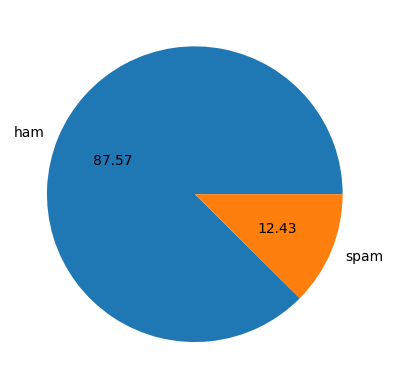

In [17]:
import matplotlib.pyplot as plt # type: ignore
plt.pie(data['Category'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()


In [18]:
# data is imbalanced

In [19]:
import nltk # type: ignore

In [20]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_

True

In [21]:
# number of characters
data['num_characters'] = data['Message'].apply(len)

In [22]:
data.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# number of words
data['num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
data.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
data['num_sentences'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
data.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.228040,18.544890,1.969750
std,58.451149,13.401415,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
data[data['Category']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.951063,17.250664,1.827724
std,56.730031,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
data[data['Category']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.541342,27.663027,2.970359
std,30.516111,7.104050,1.485575
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


3. Data Preprocessing
a. Lower case
b. Tokenization
c. Removing special characters
d. Removing stop words and panctuations
e. Stemming

In [52]:
from nltk.corpus import stopwords
# stopwords.words('english')

import string
# string.punctuation

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [61]:
def transform_text(text):
    # convert to lower case
    text = text.lower()
    # tokenization
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        # check if the character is alphanumeric
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        # removind the stopwords & punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        # Stemming the text
        y.append(ps.stem(i))

    return " ".join(y)

In [62]:
# transform_text('HI I am shivani & I enjoying the coding and also loved to learn ML from YT what you like to do?')
transform_text('Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030')

'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030'

In [64]:
data['transformed_text'] = data['Message'].apply(transform_text)

In [65]:
data.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


4. Model building

In [99]:
# import feature extraction libraries from sklear
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(max_features=3000)

In [100]:
# extract X from data
X = tfid.fit_transform(data['transformed_text']).toarray()

In [101]:
X.shape

(5157, 3000)

In [102]:
# extract y from data
y = data['Category'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [103]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [114]:
# create obj for naive bayes models
model = MultinomialNB()

In [115]:
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
print("accuracy_score :",accuracy_score(y_test, y_pred2))
print("confusion_matrix :",confusion_matrix(y_test, y_pred2))
print('precision_score :',precision_score(y_test, y_pred2))

accuracy_score : 0.9777131782945736
confusion_matrix : [[896   0]
 [ 23 113]]
precision_score : 1.0


In [116]:
# 
import pickle
pickle.dump(tfid, open('vectorizer.pkl','wb'))
pickle.dump(model, open('model.pkl','wb'))
print('Vectorizer and Model Saved !')

Vectorizer and Model Saved !
